# Handwritten digits classification using neural network


In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
from tensorflow import keras
from tensorflow.keras import models
import numpy as np

In [27]:
(X_train,y_train) , (X_test ,y_test) = keras.datasets.mnist.load_data()

In [28]:
len(X_train)

60000

In [29]:
len(X_test)

10000

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

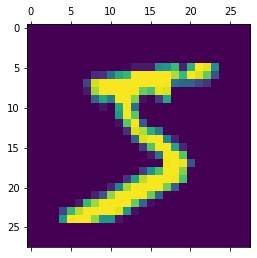

In [32]:
plt.matshow(X_train[0])

In [33]:
X_train = X_train / 255

In [34]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [35]:
X_train_flattened.shape

(60000, 784)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape =(784, ),activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)
             

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4760 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2833 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.9258


In [37]:
X_test = X_test / 255

X_test_flattened = X_test.reshape(len(X_test),28*28)
#y_test = y_test.reshape(len(y_test),28*28)

In [38]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2651 - accuracy: 0.9260


[0.2650949954986572, 0.9259999990463257]

In [39]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.2636831e-02, 3.3488070e-07, 5.0858408e-02, 9.5514721e-01,
       1.8557906e-03, 9.7127885e-02, 2.4726594e-06, 9.9967116e-01,
       8.3951950e-02, 5.9322464e-01], dtype=float32)

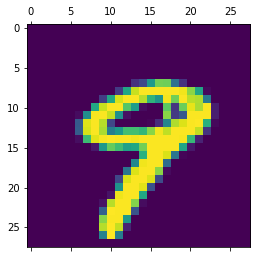

In [40]:
plt.matshow(X_test[9])

In [41]:
np.argmax(y_predicted[9])

9

In [42]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [43]:
y_predicted_labels[:7]

[7, 2, 1, 0, 4, 1, 4]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = y_predicted_labels)


Text(87.0, 0.5, 'Truth')

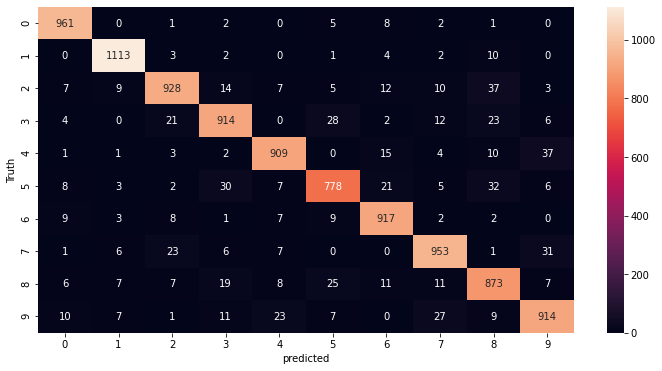

In [45]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

# Hidden Layers

In [46]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape = (784 ,),activation="selu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid"),
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/",histogram_freq=1)

model.compile(optimizer ="adam",
             loss = "sparse_categorical_crossentropy",
             metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 51s 25ms/step - loss: 0.2294 - accuracy: 0.9312
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1335 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1057 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0927 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0790 - accuracy: 0.9756


In [47]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 6s 14ms/step - loss: 0.1010 - accuracy: 0.9741


[0.10098284482955933, 0.9740999937057495]

**We will notice that accuracy of the data increases with increase in the hidden layer**

In [48]:
preds = model.predict(X_test_flattened)

In [49]:
np.argmax(preds[54])

6

In [50]:
y_test[54]

6